In [1]:
#  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
#  Modeling wine preferences by data mining from physicochemical properties.
#  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn import svm

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

#Encoding schtuff
from sklearn import preprocessing
from sklearn import utils


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt

## Import Dataset

In [76]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [77]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## Preprocess sum_noise dataset

- Understanding the data

- Remove 'Instance' as it simply represents the row number
- Extract 'Noisy Target' as regression target
- Extract 'Noisy Class' as classification target
- Extract rest columns as explananatory variables
- Apply Feature Scaling to the dataset 

- Ensure all dataframe has been converted to numpy array


## Understanding the data

#### Correlation of Features

In [78]:
def plot_pearson_correlation_of_features(train):
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

In [79]:
def plot_correlation_features_against_target(train, target):
    for column in train:
        color = np.random.rand(3,)
        plt.scatter(train[column], train[target], color=color)
        plt.title(column + " against " + target)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

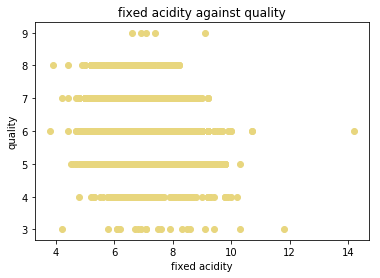

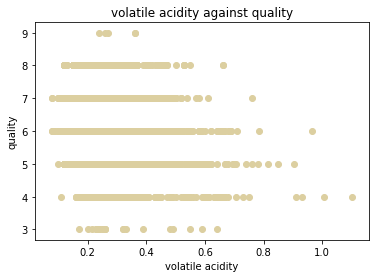

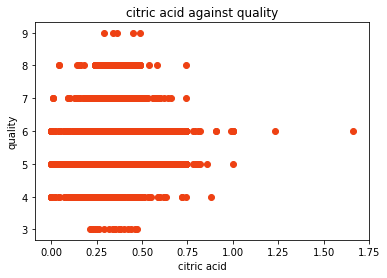

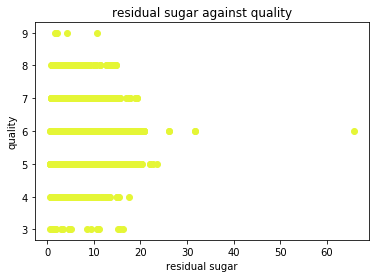

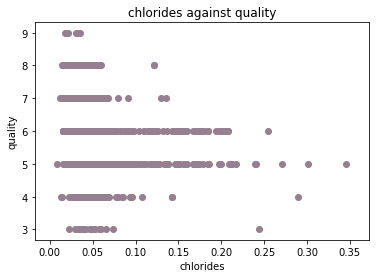

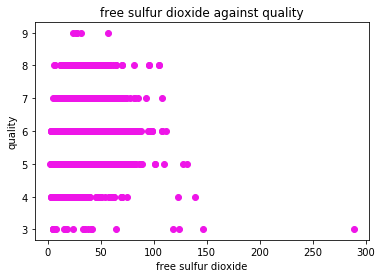

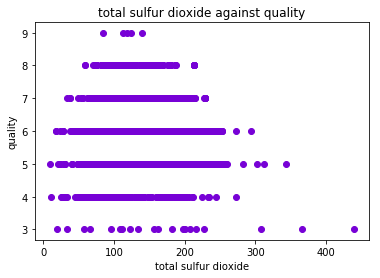

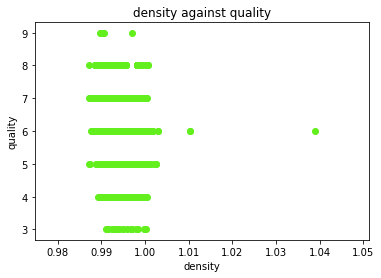

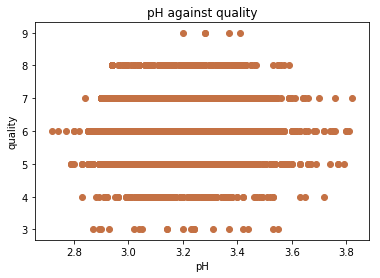

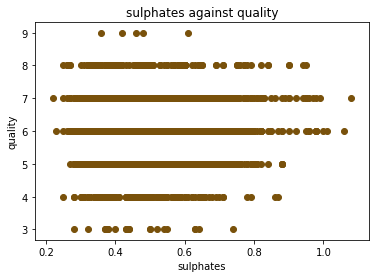

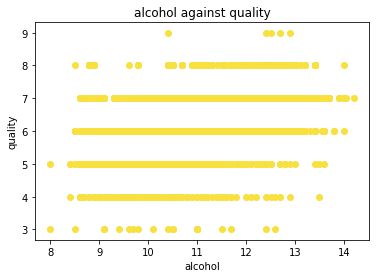

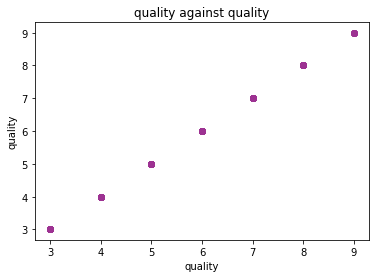

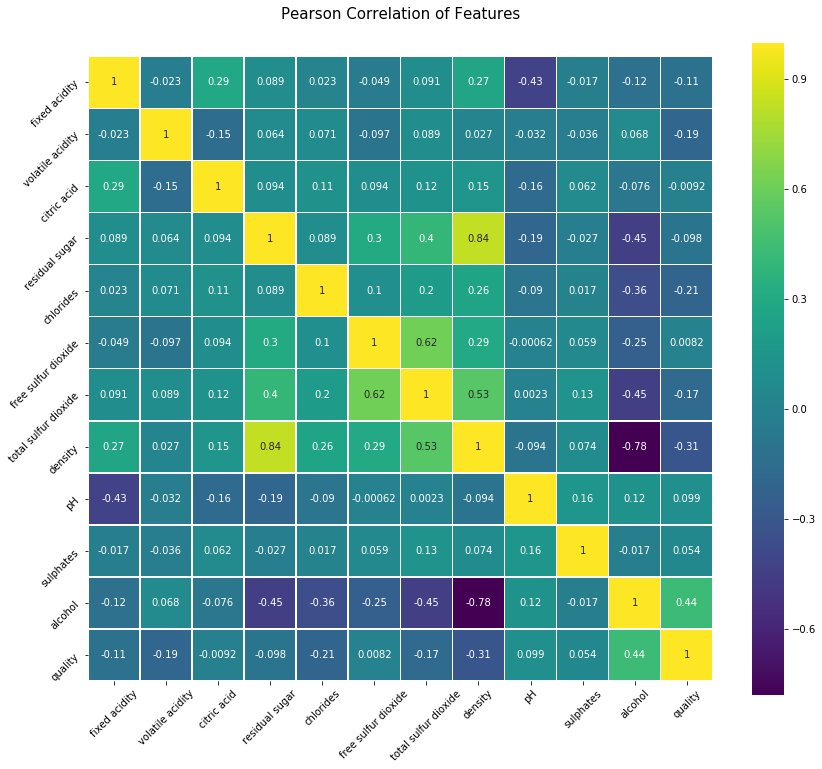

In [80]:
plot_correlation_features_against_target(data, "quality")
plot_pearson_correlation_of_features(data)

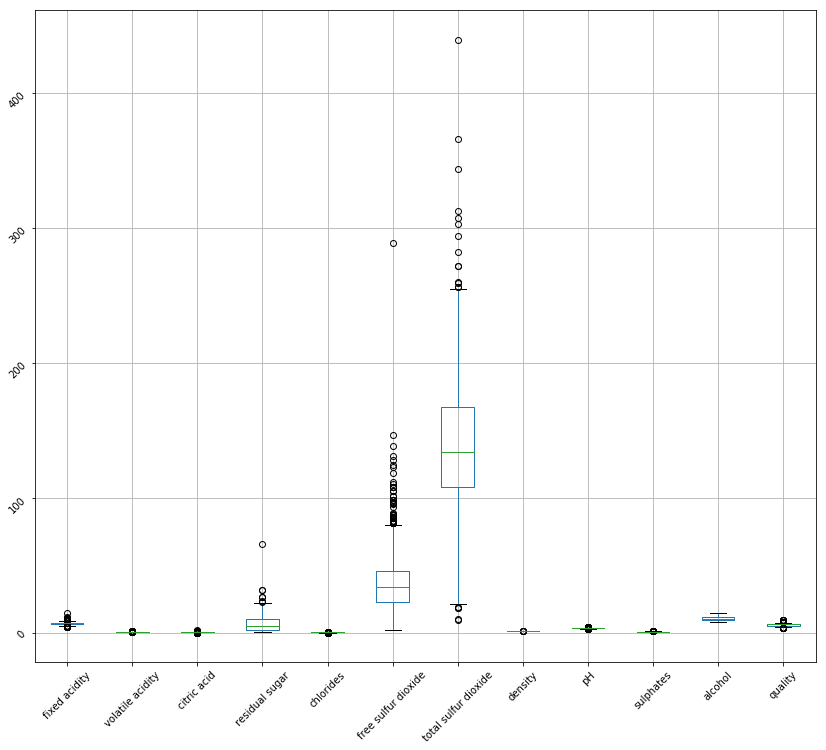

In [81]:


plt.figure(figsize=(14,12))
data.boxplot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Evaluation

In [112]:
data = np.asarray(data)
kf = KFold(n_splits = 2)
kf.get_n_splits(data)

for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = train_test_split(train_index, test_index, test_size=0.4, random_state=0)
    data_train_X = data[X_train]
    data_train_y = data[y_train]
    data_train_y = data_train_y[:,0]
    
    data_test_X = data[X_test]
    data_test_y = data[y_test]
    data_test_y = data_test_y[:,0]
    
    clf = svm.SVC(kernel='linear', C=1).fit(data_train_X, y_train)
    score = clf.score(data_test_X, y_test) 
    
    print(score)

0.0
0.0


In [104]:
# #Cross vailidation to estimate confidence intervals
# #K-folds
# data = np.asarray(data)
# kf = KFold(n_splits = 2)
# kf.get_n_splits(data)
# print(kf)
# for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     data_train = data[train_index]
#     data_test = data[test_index]
    
#     print(data_train.shape)
    
#     data_test = data_test[:,0]
#     print(data_test.shape)
    
#     X_selected = SelectKBest(f_regression, k=12).fit_transform(data_train, data_test)
    
#     X_train, X_test, y_train, y_test = train_test_split(X_selected, data_test, test_size=0.5, random_state=0)
    
#     fitscores = []
#     predictscores = []
    
#     alphas = np.logspace(-1,4,num=25)

#     estimator = svm.SVC(kernel='linear', C=1)
#     fitscores.append(cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro'))
#     predictscores.append(estimator.score(X_test,y_test))

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [ ]:
# try and do filter and wrapper functions 